In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
summer_ds = pd.read_csv("summer.csv")

In [3]:
summer_ds.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer_ds.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [5]:
summer_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB



As there is no null values present we don't require to remove null values.

**1. In how many cities Summer Olympics is held so far?**

In [6]:
Cities = summer_ds['City'].unique()
for city in Cities:
  print(city)
print("\nThe total number of cities where summer olympics were held are : ",len(Cities))

Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing

The total number of cities where summer olympics were held are :  22


**2. Which sports is having more number of Gold Medal so far?**

In [7]:
nog = summer_ds[summer_ds['Medal'] == 'Gold'] #nog-->number of gold
Gold_medal = []

for i in nog['Sport'].unique():
    Gold_medal.append([i, len(nog[nog['Sport'] == i])])

Gold_medal = pd.DataFrame(Gold_medal, columns = ['Sport', 'Medals'])
Gold_medal = Gold_medal.sort_values(by = 'Medals', ascending = False).head()

#head is being used as head() return top 5 value and it is what is asked in the question.

In [8]:
print(Gold_medal)

         Sport  Medals
0     Aquatics    1421
1    Athletics    1215
17      Rowing     890
4   Gymnastics     820
3      Fencing     552


******************************************Bar Representation******************************************


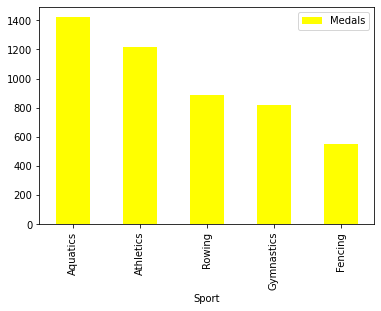

In [9]:
print("******************************************Bar Representation******************************************")
Gold_medal.plot(x = 'Sport', y = 'Medals', kind = 'bar', color = 'yellow');

**3. Which sport is having most number of medals so far?**

In [10]:
Sport_with_most_medal = []
for ele in summer_ds['Sport'].unique():
    Sport_with_most_medal.append([ele, len(summer_ds[summer_ds['Sport'] == ele])])
Sport_with_most_medal = pd.DataFrame(Sport_with_most_medal, columns = ['Sport', 'Max Medals'])
Sport_with_most_medal = Sport_with_most_medal.sort_values(by = 'Max Medals', ascending = False).head()

In [11]:
Sport_with_most_medal

,Sport,Max Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


******************************************Bar Representation******************************************


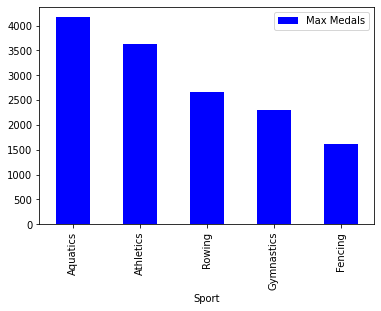

In [12]:
print("******************************************Bar Representation******************************************")
Sport_with_most_medal.plot(x = 'Sport', y = 'Max Medals', kind = 'bar', color = 'Blue');

**4. Which player has won most number of medals?**

In [13]:
Medal_no = []

for player in summer_ds['Athlete'].unique():
    Medal_no.append([player, len(summer_ds[summer_ds['Athlete'] == player])])

Medal_no = pd.DataFrame(Medal_no, columns = ['Player', 'Medals of Player'])
Medal_no = Medal_no.sort_values(by = 'Medals of Player', ascending = False).head()

In [14]:
print(Medal_no)

                     Player  Medals of Player
18640       PHELPS, Michael                22
7197       LATYNINA, Larisa                18
9948     ANDRIANOV, Nikolay                15
6591           ONO, Takashi                13
5103   MANGIAROTTI, Edoardo                13


******************************************Bar Representation******************************************


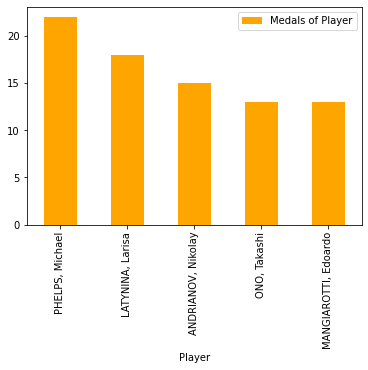

In [15]:
print("******************************************Bar Representation******************************************")
Medal_no.plot(x = 'Player', y = 'Medals of Player', kind = 'bar', color = 'Orange');

**5. Which player has won most number of Gold medals ?**

In [16]:
won_medal = summer_ds[summer_ds['Medal'] == 'Gold']
Gold_player = []
for i in won_medal['Athlete'].unique():
   Gold_player.append([i, len(won_medal[won_medal['Athlete'] == i])])
Gold_player = pd.DataFrame(Gold_player, columns = ['Player', 'Gold Medals'])
Gold_player = Gold_player.sort_values(by = 'Gold Medals', ascending = False).head()

In [17]:
Gold_player

,Player,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


******************************************Bar Representation******************************************


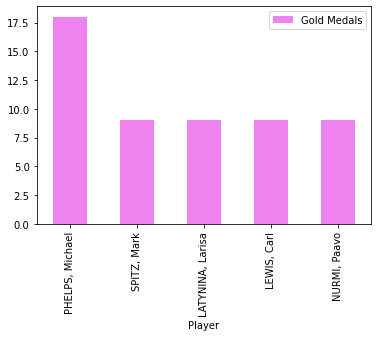

In [18]:
print("******************************************Bar Representation******************************************")
Gold_player.plot(x = 'Player', y = 'Gold Medals', kind = 'bar', color = 'Violet');

**6. In which year India won first Gold Medal in Summer Olympics?**

In [19]:
for_medal = summer_ds[summer_ds['Medal'] == 'Gold']
for_country = for_medal.loc[for_medal['Country'] == 'IND']

In [20]:
print(for_country.iloc[0])

Year                          1928
City                     Amsterdam
Sport                       Hockey
Discipline                  Hockey
Athlete       ALLEN, Richard James
Country                        IND
Gender                         Men
Event                       Hockey
Medal                         Gold
Name: 5512, dtype: object


As we can see India won first Gold medal in year 1928.

**7. Which event is most popular in terms on number of players?**

In [21]:
event = []

for e in summer_ds['Event'].unique():
    event.append([e, len(summer_ds[summer_ds['Event'] == e])])
    
event = pd.DataFrame(event, columns = ['Event', 'Total Players'])
event = event.sort_values(by = 'Total Players', ascending = False).head()

In [22]:
print("The popular event considering number of players is: ",event)

The popular event considering number of players is:                  Event  Total Players
80           Football           1497
176            Hockey           1422
138  Team Competition           1147
327        Basketball           1012
337          Handball            973


******************************************Bar Representation******************************************


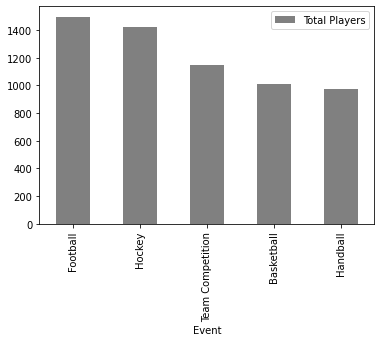

In [23]:
print("******************************************Bar Representation******************************************")
event.plot(x = 'Event', y = 'Total Players', kind = 'bar', color = 'Grey');

**8. Which sport is having most female Gold medalists?**

In [24]:
medal = summer_ds[summer_ds['Medal'] == 'Gold']
women = medal[medal['Gender'] == 'Women']

gold_women = []

for i in women['Sport'].unique():
    gold_women.append([i, len(women[women['Sport'] == i])])

gold_women = pd.DataFrame(gold_women, columns = ['Sport', 'Female Gold Winners'])
gold_women = gold_women.sort_values(by = 'Female Gold Winners', ascending = False).head()

In [25]:
print(gold_women)

         Sport  Female Gold Winners
4     Aquatics                  589
7    Athletics                  389
8   Gymnastics                  268
14      Rowing                  217
11  Volleyball                  166


******************************************Bar Representation******************************************


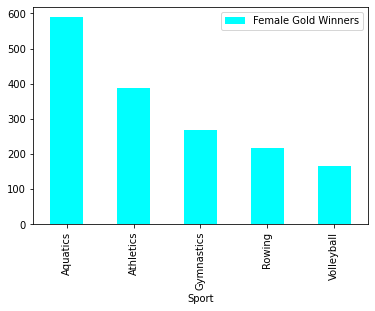

In [26]:
print("******************************************Bar Representation******************************************")
gold_women.plot(x = 'Sport', y = 'Female Gold Winners', kind = 'bar', color = 'cyan');

This Assigment is done by - Priya Pudke.